In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 로드
df = pd.read_csv('random_data1.csv')

# 입력 변수와 출력 변수 분리
X = df[['body', 'texture', 'sweetness']]
y = df['score']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [2]:
# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
# SVR 모델 훈련
svr = SVR(kernel='rbf', C=100, gamma=0.1)
svr.fit(X_train_scaled, y_train)



SVR(C=100, gamma=0.1)

In [4]:
# 예측
y_pred = svr.predict(X_test_scaled)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')


Mean Squared Error: 1.32
R^2 Score: 0.31


In [5]:
# 새로운 데이터 예시
new_data = pd.DataFrame({
    'body': [6.0],
    'texture': [4.0],
    'sweetness': [5.0]
})

# 새로운 데이터 표준화
new_data_scaled = scaler.transform(new_data)

# 점수 예측
predicted_score = svr.predict(new_data_scaled)
print(f'Predicted Score: {predicted_score[0]:.2f}')


Predicted Score: 2.63


Mean Squared Error: 1.32
R^2 Score: 0.31


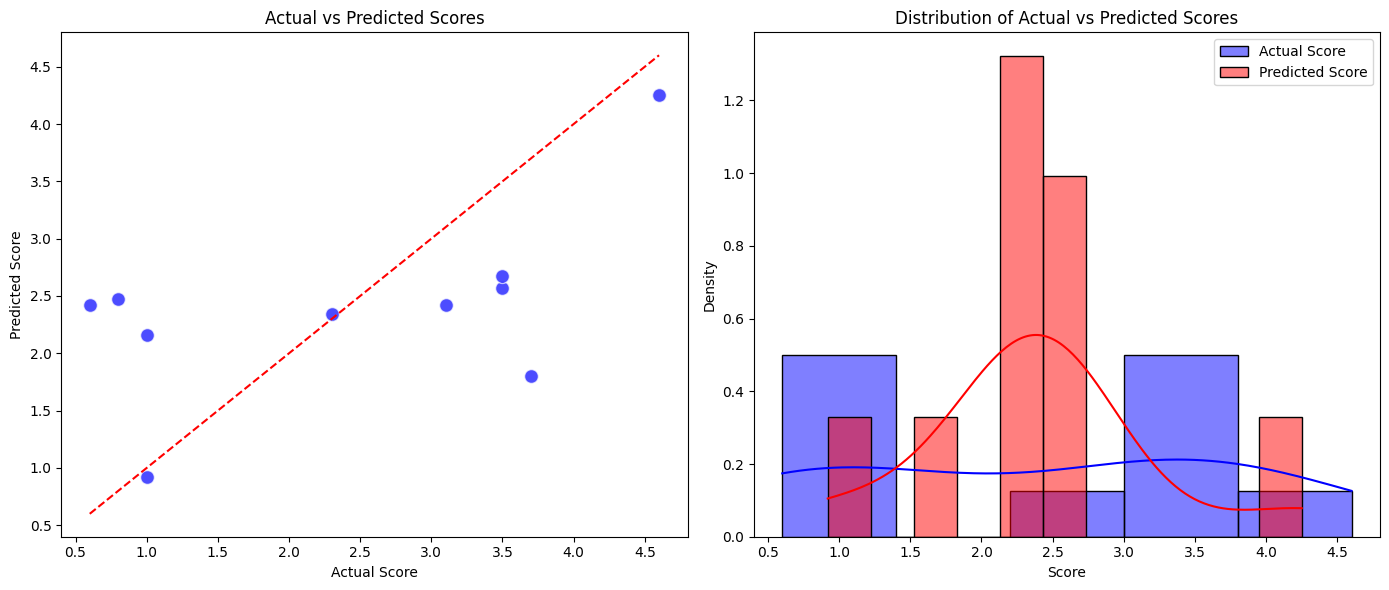

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv('random_data1.csv')

# 입력 변수와 출력 변수 분리
X = df[['body', 'texture', 'sweetness']]
y = df['score']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVR 모델 훈련
svr = SVR(kernel='rbf', C=100, gamma=0.1)
svr.fit(X_train_scaled, y_train)

# 예측
y_pred = svr.predict(X_test_scaled)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# 시각화
plt.figure(figsize=(14, 6))

# 실제 vs 예측 그래프
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, edgecolors='w', s=100)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted Scores')

# 실제 데이터와 예측 데이터의 분포 비교
plt.subplot(1, 2, 2)
sns.histplot(y_test, color='blue', label='Actual Score', kde=True, stat='density')
sns.histplot(y_pred, color='red', label='Predicted Score', kde=True, stat='density')
plt.xlabel('Score')
plt.ylabel('Density')
plt.title('Distribution of Actual vs Predicted Scores')
plt.legend()

plt.tight_layout()
plt.show()
